In [1]:
!ls

ann-31-07-2018.csv  dataset_bernoulli.csv  dump.py    Untitled.ipynb
bayes.py	    dataset_gaussian.csv   runner.py
benchmarks.csv	    dataset_reduzido.csv   test.py


Text(0.5, 1.0, 'Custo Computacional, em CPU ( Ryzen 7 )')

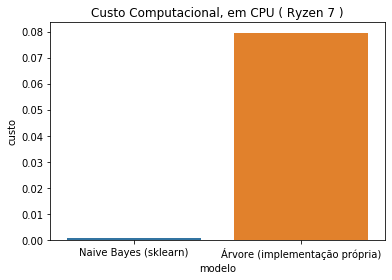

In [49]:
import pandas as pd
import numpy as np
df = pd.read_csv('benchmarks.csv').groupby('1').count()
selected = ['corrected_combined_ann_trees-02-07-2019',
           'new_ann-02-07-2019',
           'new_naive-bayes-02-07-2019',
           'new_trees-02-07-2019']
df = df[df.index.isin(selected)]
df = df\
.apply(lambda x: (1/x) * 1000 )\
.reset_index()\
[['1','0']]
df = df.iloc[2:4].reset_index()
df['1'] = pd.Series(['Naive Bayes (sklearn)','Árvore (implementação própria)'])
g = sns.barplot(x='1', y='0', data=df)
g.set(xlabel='modelo')
g.set(ylabel='custo')
g.set_title('Custo Computacional, em CPU ( Ryzen 7 )')

Text(0.5, 1.0, 'Custo Computacional, em CPU ( Ryzen 7 )')

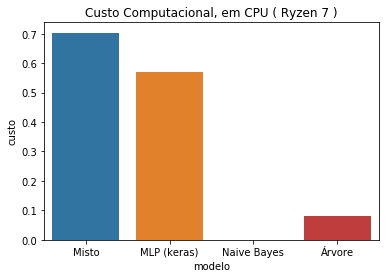

In [53]:
import pandas as pd
import numpy as np
df = pd.read_csv('benchmarks.csv').groupby('1').count()
selected = ['corrected_combined_ann_trees-02-07-2019',
           'new_ann-02-07-2019',
           'new_naive-bayes-02-07-2019',
           'new_trees-02-07-2019']
df = df[df.index.isin(selected)]
df = df\
.apply(lambda x: (1/x) * 1000 )\
.reset_index()\
[['1','0']]
df['1'] = pd.Series(['Misto', 'MLP (keras)', 'Naive Bayes','Árvore'])
g = sns.barplot(x='1', y='0', data=df)
g.set(xlabel='modelo')
g.set(ylabel='custo')
g.set_title('Custo Computacional, em CPU ( Ryzen 7 )')

In [13]:
def get_results(key):
    results = pd.read_csv('benchmarks.csv')
    results = results[results['1'].str.contains(key)]
    results = results.iloc[:, 2:]
    results = results.rename(columns={
        '2': '0',
        '3': '1',
        '4': '2',
        '5': '3'
    })
    results['acc'] = ( results['0'] + results['3'] ) / \
    ( results['0'] + results['1'] + results['2'] + results['3'])
    results['pos'] = results['3'] / ( results['3'] + results['1'] )
    results['neg'] = results['0'] / ( results['0'] + results['2'] )
    return results[['acc', 'pos', 'neg']]

In [14]:
get_results('new_ann').agg([np.mean, np.std]).round(2)

,acc,pos,neg
mean,0.92,0.69,0.96
std,0.02,0.09,0.02


In [15]:
get_results('new_naive').agg([np.mean, np.std]).round(2)

,acc,pos,neg
mean,0.89,0.60,0.93
std,0.05,0.22,0.06


In [16]:
get_results('new_trees').agg([np.mean, np.std]).round(2)

,acc,pos,neg
mean,0.93,0.74,0.96
std,0.02,0.10,0.02


In [17]:
get_results('corrected_combined_ann').agg([np.mean, np.std]).round(2)

,acc,pos,neg
mean,0.93,0.79,0.95
std,0.04,0.19,0.04


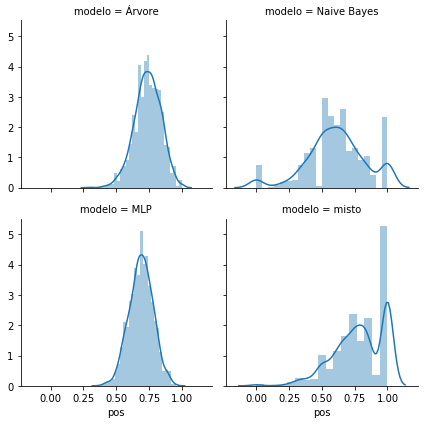

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('benchmarks.csv')
df['pos'] = ( df['5'] ) / ( df['3'] + df['5'] )
df = df[['1','pos']]
import seaborn as sns

selected = ['corrected_combined_ann_trees-02-07-2019',
           'new_ann-02-07-2019',
           'new_naive-bayes-02-07-2019',
           'new_trees-02-07-2019']
df = df[df['1'].isin(selected)]

df = df.groupby(['1']).head(1400)

df['1'] = df['1'].apply(lambda x: x.split('_')[1].split('-')[0])

df = df.rename(columns={'1': 'modelo'})
df = df.replace({"trees": "Árvore", "naive": "Naive Bayes", "ann": "MLP", "combined": "misto"})
g = sns.FacetGrid(df, col="modelo", col_wrap=2)
g.map(sns.distplot, "pos");

Text(0.5, 1.0, 'Acurácia de distinção entre falso e verdadeiro positivo')

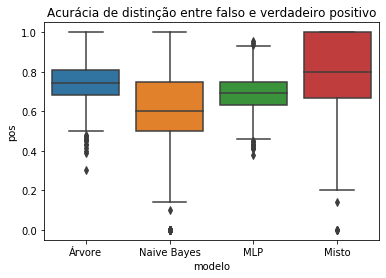

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('benchmarks.csv')
df['pos'] = ( df['5'] ) / ( df['3'] + df['5'] )
df = df[['1','pos']]
import seaborn as sns

selected = ['corrected_combined_ann_trees-02-07-2019',
           'new_ann-02-07-2019',
           'new_naive-bayes-02-07-2019',
           'new_trees-02-07-2019']
df = df[df['1'].isin(selected)]

df = df.groupby(['1']).head(1400)

df['1'] = df['1'].apply(lambda x: x.split('_')[1].split('-')[0])

df = df.rename(columns={'1': 'modelo'})
g = sns.boxplot(x='modelo', y='pos', data=df)
g.set(xticklabels=['Árvore','Naive Bayes','MLP','Misto'])
g.set_title('Acurácia de distinção entre falso e verdadeiro positivo')